In [1]:
from google.colab import drive

In [4]:
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import pandas as pd


In [6]:
data=pd.read_csv('/content/drive/MyDrive/data/titanic.csv')

In [7]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

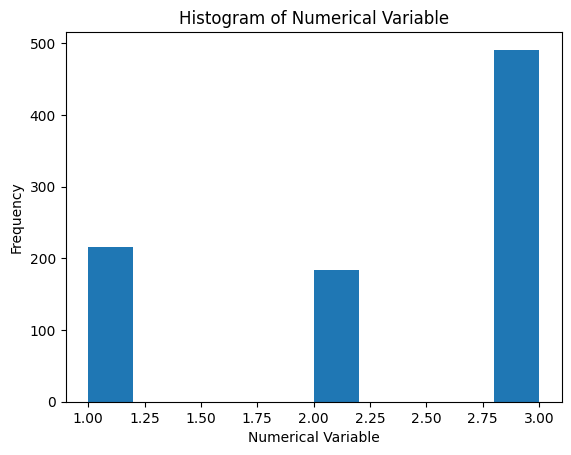

In [11]:
plt.hist(data['pclass'], bins=10)
plt.xlabel('Numerical Variable')
plt.ylabel('Frequency')
plt.title('Histogram of Numerical Variable')
plt.show()

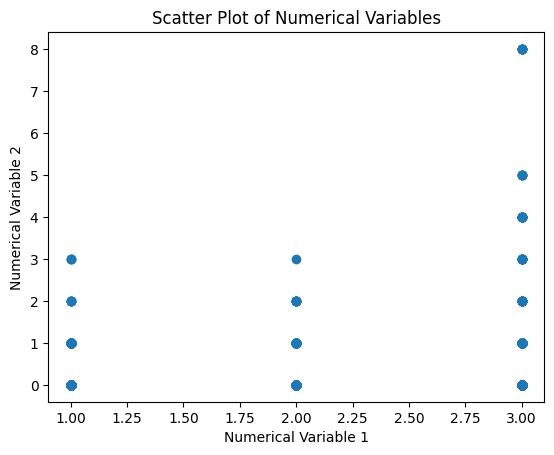

In [12]:
plt.scatter(data['pclass'], data['sibsp'])
plt.xlabel('Numerical Variable 1')
plt.ylabel('Numerical Variable 2')
plt.title('Scatter Plot of Numerical Variables')
plt.show()

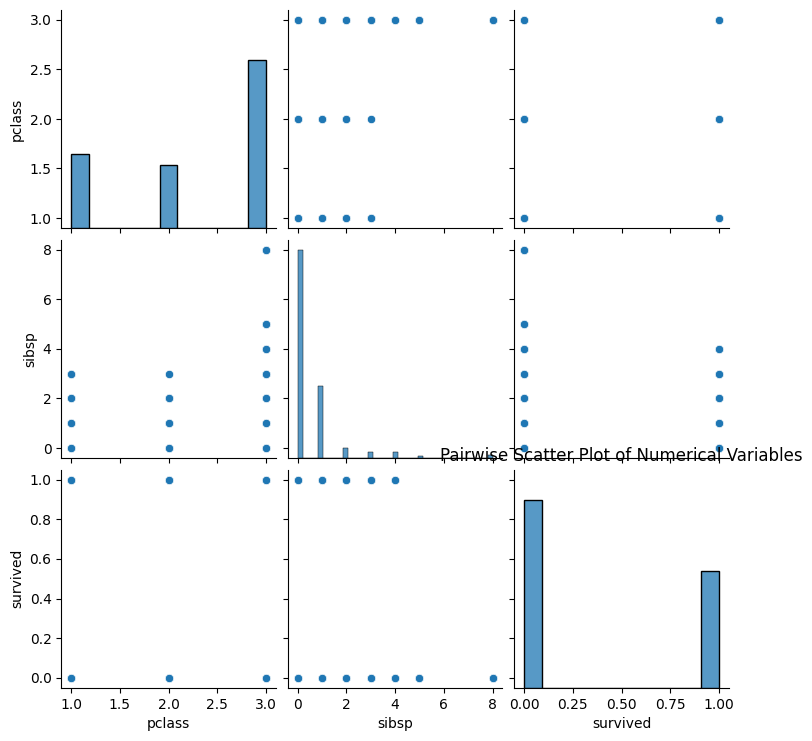

In [14]:
sns.pairplot(data[['pclass', 'sibsp', 'survived']])
plt.title('Pairwise Scatter Plot of Numerical Variables')
plt.show()

In [15]:
statistics = data.describe()
print(statistics)

         survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200


In [17]:
import numpy as np
print(data.isnull().sum())

# Remove rows or columns with missing values
data.dropna(axis=0, inplace=True)  # Remove rows with missing values
data.dropna(axis=1, inplace=True)  # Remove columns with missing values

# Impute missing values
data['age'].fillna(data['age'].mean(), inplace=True)
data['pclass'].fillna(data['pclass'].mode()[0], inplace=True)

# Create an indicator variable
data['sibsp'] = np.where(data['age'].isnull(), 1, 0)

# Verify if missing values are handled
print(data.isnull().sum())

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64
survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64


In [18]:
from scipy.stats import zscore


z_scores = np.abs(zscore(data['age']))

# Define a threshold for identifying outliers
threshold = 3

# Find the indices of outliers
outlier_indices = np.where(z_scores > threshold)[0]

# Replace outliers with a suitable value (e.g., mean, median, or custom value)
replacement_value = data['age'].median()
data['age'].iloc[outlier_indices] = replacement_value

# Display the modified dataset
print(data)

     survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
1           1       1  female  38.0      0      0  71.2833        C  First   
3           1       1  female  35.0      0      0  53.1000        S  First   
6           0       1    male  54.0      0      0  51.8625        S  First   
10          1       3  female   4.0      0      1  16.7000        S  Third   
11          1       1  female  58.0      0      0  26.5500        S  First   
..        ...     ...     ...   ...    ...    ...      ...      ...    ...   
871         1       1  female  47.0      0      1  52.5542        S  First   
872         0       1    male  33.0      0      0   5.0000        S  First   
879         1       1  female  56.0      0      1  83.1583        C  First   
887         1       1  female  19.0      0      0  30.0000        S  First   
889         1       1    male  26.0      0      0  30.0000        C  First   

       who  adult_male deck  embark_town alive  alone  
1    wo

<ipython-input-18-a0ed56bb7def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['age'].iloc[outlier_indices] = replacement_value


In [20]:
categorical_columns = data.select_dtypes(include=['int']).columns

# Perform one-hot encoding for categorical columns
df_encoded = pd.get_dummies(data, columns=categorical_columns)

# Display the encoded dataset
print(df_encoded)

        sex   age     fare embarked  class    who  adult_male deck  \
1    female  38.0  71.2833        C  First  woman       False    C   
3    female  35.0  53.1000        S  First  woman       False    C   
6      male  54.0  51.8625        S  First    man        True    E   
10   female   4.0  16.7000        S  Third  child       False    G   
11   female  58.0  26.5500        S  First  woman       False    C   
..      ...   ...      ...      ...    ...    ...         ...  ...   
871  female  47.0  52.5542        S  First  woman       False    D   
872    male  33.0   5.0000        S  First    man        True    B   
879  female  56.0  83.1583        C  First  woman       False    C   
887  female  19.0  30.0000        S  First  woman       False    B   
889    male  26.0  30.0000        C  First    man        True    C   

     embark_town alive  ...  survived_0  survived_1  pclass_1  pclass_2  \
1      Cherbourg   yes  ...           0           1         1         0   
3    Sout

In [21]:
X = data.drop('age', axis=1)  # Independent variables
y = data['age']  # Dependent variable

print(X)

print(y)

     survived  pclass     sex  sibsp  parch     fare embarked  class    who  \
1           1       1  female      0      0  71.2833        C  First  woman   
3           1       1  female      0      0  53.1000        S  First  woman   
6           0       1    male      0      0  51.8625        S  First    man   
10          1       3  female      0      1  16.7000        S  Third  child   
11          1       1  female      0      0  26.5500        S  First  woman   
..        ...     ...     ...    ...    ...      ...      ...    ...    ...   
871         1       1  female      0      1  52.5542        S  First  woman   
872         0       1    male      0      0   5.0000        S  First    man   
879         1       1  female      0      1  83.1583        C  First  woman   
887         1       1  female      0      0  30.0000        S  First  woman   
889         1       1    male      0      0  30.0000        C  First    man   

     adult_male deck  embark_town alive  alone  
1 

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
from sklearn.preprocessing import StandardScaler

In [27]:
X = data.drop('sex', axis=1) 
y = data['sex'] 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

print(X_scaled_df)

ValueError: ignored

In [29]:
X = data.drop('age', axis=1)  # Independent variables
y = data['age']  # Dependent variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of the training and testing sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (145, 14)
X_test shape: (37, 14)
y_train shape: (145,)
y_test shape: (37,)
